In [16]:
import numpy as np
from PIL import Image

In [17]:
img = Image.open("Shelti-15.jpg")

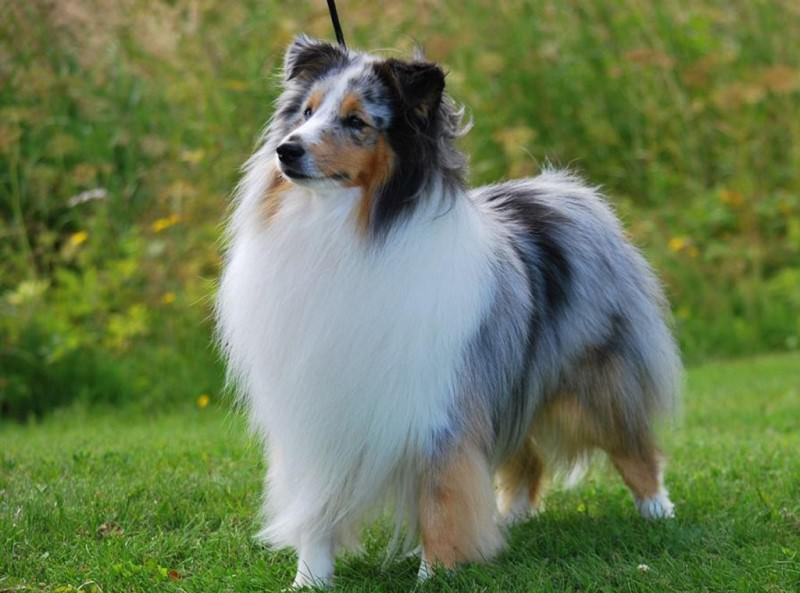

In [18]:
img

In [19]:
np.array(img).shape

(593, 800, 3)

In [20]:
img_array = np.array(img)

In [21]:
img_array_without_green = img_array.copy()
img_array_without_green[:, :, 1] = 0

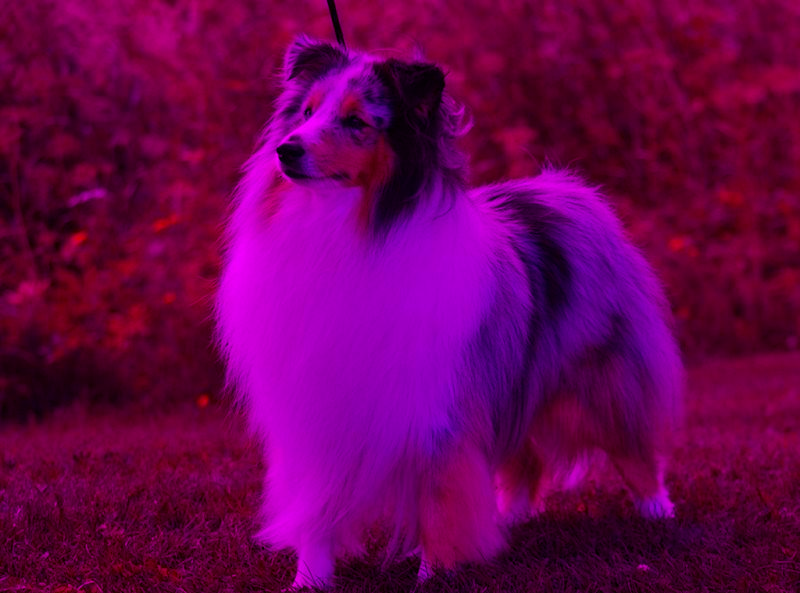

In [22]:
Image.fromarray(img_array_without_green)

In [23]:
img_array_with_full_green = img_array.copy()
img_array_with_full_green[:, :, 1] = 255

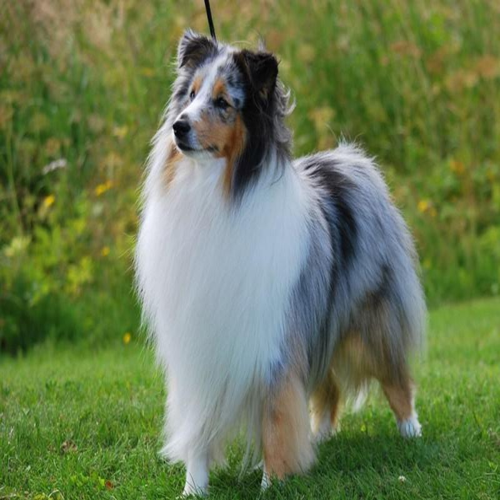

In [24]:
img.resize((500, 500))

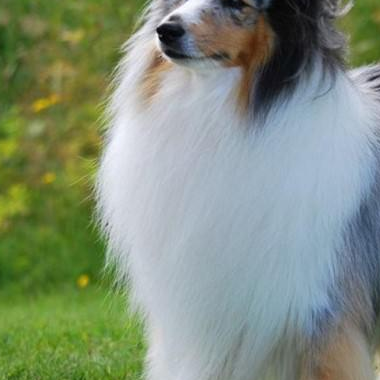

In [25]:
img.crop((120, 120, 500, 500))

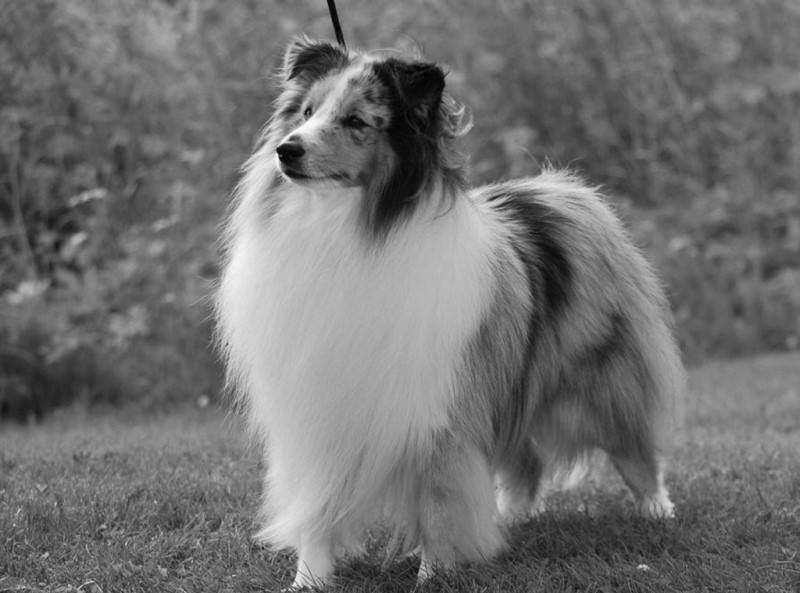

In [26]:
img.convert("L")

In [27]:
np.array(img.convert("L")).shape

(593, 800)

In [28]:
import albumentations

In [29]:
transform_bright = albumentations.transforms.RandomBrightness(p=1, limit=0.8)

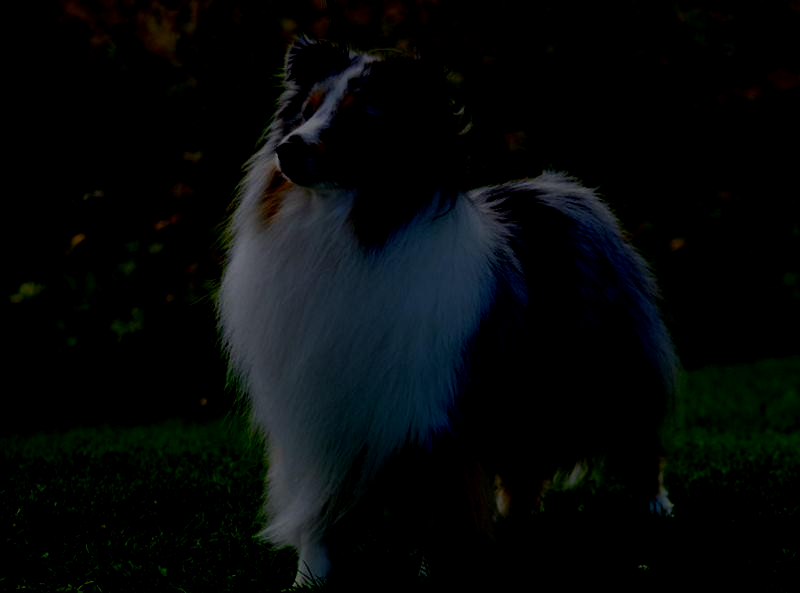

In [30]:
Image.fromarray(transform_bright(image=img_array)["image"])

In [31]:
transform_contrast = albumentations.transforms.RandomContrast(p=1, limit=0.8)

C:\Users\Oleg\miniconda3\envs\mlisuct\lib\site-packages\albumentations\augmentations\transforms.py:1770: FutureWarning: This class has been deprecated. Please use RandomBrightnessContrast
  warnings.warn(


In [32]:
Image.fromarray(transform_contrast(image=img_array)["image"])

In [33]:
transform_blur = albumentations.transforms.GaussianBlur(p=1, blur_limit=(1, 15))

In [34]:
Image.fromarray(transform_blur(image=img_array)["image"])

In [35]:
import albumentations as A

In [36]:
transform_pipeline = A.Compose(
    [
        albumentations.transforms.GaussianBlur(p=0.5, blur_limit=(1, 15)),
        albumentations.transforms.RandomBrightness(p=0.5, limit=0.5),
        albumentations.transforms.RandomContrast(p=1, limit=0.5),
    ]
)

In [37]:
img_transformed = transform_pipeline(image=img_array)["image"]

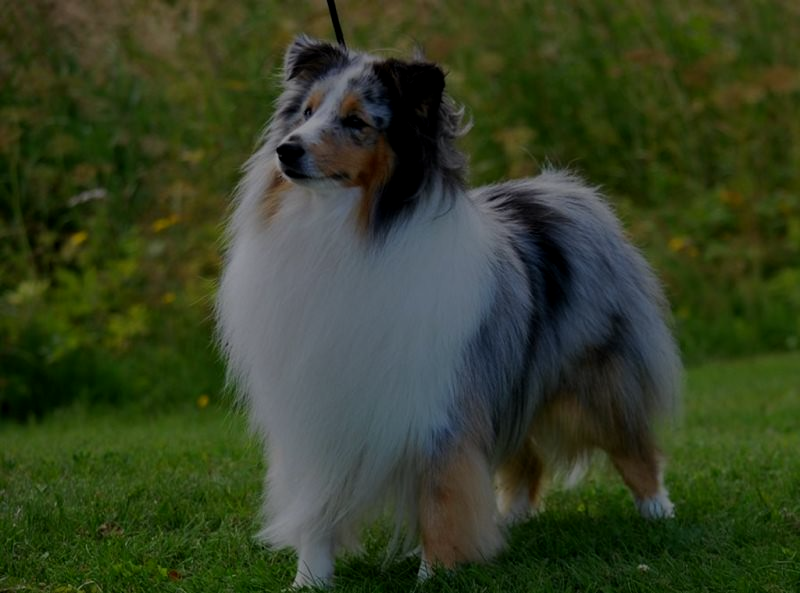

In [38]:
Image.fromarray(img_transformed)

In [39]:
from pathlib import Path

In [40]:
class ImageDataset:
    
    def __init__(self, path: Path, transforms=None):
        self.img_pathes = list(path.rglob("*.png"))
#         self.transforms = ...
        
    def __len__(self):
        pass
    
    def __getitem__(self, index):
        img_path = self.img_pathes[index]
        img = Image.open(img_path)
#         self.transforms()
        return {
            "image": img,
            "label": img_path.stem
        }

In [41]:
data = ImageDataset(Path("images"))

In [42]:
data[88]["image"]

IndexError: list index out of range